<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/05-24-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [179]:
print("US Summary")
dfCovidtracking.groupby(by='date').sum()[-3:][['positive', 'death', 'positiveIncrease', 'deathIncrease']]

US Summary


,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-23,1614954,91287,22298.0,1091.0
2020-05-24,1635760,91941,20806.0,654.0
2020-05-25,1654829,92464,19069.0,523.0


In [180]:
dfCovidtracking[dfCovidtracking.state=='CA'].groupby(by='date').sum()[-3:][['positive', 'death', 'positiveIncrease', 'deathIncrease']].head(5)

,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-23,90631,3708,2187.0,78.0
2020-05-24,92710,3774,2079.0,66.0
2020-05-25,94558,3795,1848.0,21.0


In [181]:
dfctd_state_curr = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()] \
  .rename(columns={'positive':'total_positive'}) \
  .set_index('state') 

print(f"Total positive cases = {dfctd_state_curr.total_positive.sum()}")
print(f"Total deaths = {dfctd_state_curr.death.sum()}")
  
dfctd_state_curr.sort_values(by='total_positive', ascending=False).head(5)

Total positive cases = 1654829
Total deaths = 92464


,date,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,,
NY,2020-05-25,362764,1376685,0,4348.0,77525.0,1366.0,0.0,1058.0,0.0,64280.0,A,5/25/2020 00:00,f5abe5b7a5a69b77910f151653b6145277aede01,2020-05-25T20:00:00Z,23488,77525.0,1739449,1739449,1739449,36,97.0,230.0,38374.0,1249.0,39623.0
NJ,2020-05-25,155092,468705,0,2755.0,0.0,719.0,0.0,540.0,0.0,25253.0,A+,5/25/2020 13:00,dc7bcd00a0c9c44ed90871902524295370fa9b7c,2020-05-25T20:00:00Z,11144,0.0,623797,623797,623797,34,11.0,0.0,19052.0,938.0,19990.0
IL,2020-05-25,112017,657547,0,3762.0,0.0,1025.0,0.0,605.0,0.0,0.0,A,5/25/2020 00:00,85a23a9229402532cdb4bb83f787adbf41886dcb,2020-05-25T20:00:00Z,4884,0.0,769564,769564,769564,17,28.0,0.0,19930.0,1713.0,21643.0
CA,2020-05-25,94558,1549544,0,4306.0,0.0,1301.0,0.0,0.0,0.0,0.0,B,5/25/2020 00:00,750e15df84d5983b3826fb0df9b1f236c50a4017,2020-05-25T20:00:00Z,3795,0.0,1644102,1644102,1644102,06,21.0,0.0,59509.0,1848.0,61357.0
MA,2020-05-25,93271,447290,0,2132.0,9339.0,576.0,0.0,0.0,0.0,0.0,A,5/25/2020 10:00,db95c8a890c23bc9c1b179f4276f131340a2799b,2020-05-25T20:00:00Z,6416,9339.0,540561,540561,540561,25,44.0,31.0,7592.0,596.0,8188.0


In [0]:
curr_state = 'CA'
gbUSA = dfCovidtracking.groupby(['date'])
gbState = dfCovidtracking[dfCovidtracking.state==curr_state].groupby(['date'])

cols = ['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']

dfUSAPos = gbUSA[cols].sum().reset_index().copy()
dfStatePos = gbState[cols].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 

dfUSAPos['pos_pct']= dfUSAPos.positive/dfctd_state_curr.total_positive.sum()
dfStatePos['pos_pct']=dfStatePos.positive/dfctd_state_curr.loc[curr_state].total_positive

In [183]:
dfUSAPos[-7:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
118,2020-05-19,1521252,12202812,86070,20940.0,1430.0,0.919280
119,2020-05-20,1542594,12608216,87472,21342.0,1402.0,0.932177
120,2020-05-21,1568497,13024762,88916,25903.0,1444.0,0.947830
121,2020-05-22,1592656,13419058,90196,24159.0,1280.0,0.962429
122,2020-05-23,1614954,13784786,91287,22298.0,1091.0,0.975904
123,2020-05-24,1635760,14163694,91941,20806.0,654.0,0.988477
124,2020-05-25,1654829,14604942,92464,19069.0,523.0,1.000000


In [184]:
dfStatePos[-7:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
76,2020-05-19,81795,1339316,3334,1365.0,32.0,0.865025
77,2020-05-20,84057,1380120,3436,2262.0,102.0,0.888946
78,2020-05-21,86197,1421127,3542,2140.0,106.0,0.911578
79,2020-05-22,88444,1466773,3630,2247.0,88.0,0.935341
80,2020-05-23,90631,1515306,3708,2187.0,78.0,0.958470
81,2020-05-24,92710,1582745,3774,2079.0,66.0,0.980456
82,2020-05-25,94558,1644102,3795,1848.0,21.0,1.000000


In [185]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-21,1568497,11456265,3641,39915.0,166254.0,9090.0,7412.0,4868.0,616.0,298418.0,88916,166254.0,13028403,13024762,13024762,1444.0,4638.0,390643.0,25903.0,416546.0
2020-05-22,1592656,11826402,3709,38802.0,170697.0,9048.0,7689.0,4716.0,633.0,350135.0,90196,170697.0,13422767,13419058,13419058,1280.0,4443.0,370137.0,24159.0,394296.0
2020-05-23,1614954,12169832,4084,37873.0,172037.0,8812.0,7770.0,4620.0,638.0,361239.0,91287,172037.0,13788870,13784786,13784786,1091.0,1340.0,343430.0,22298.0,365728.0
2020-05-24,1635760,12527934,3860,36706.0,172574.0,8487.0,7801.0,4383.0,639.0,366736.0,91941,172574.0,14167554,14163694,14163694,654.0,537.0,358102.0,20806.0,378908.0
2020-05-25,1654829,12950113,3368,36668.0,173541.0,8472.0,7847.0,4237.0,642.0,379157.0,92464,173541.0,14608310,14604942,14604942,523.0,967.0,422179.0,19069.0,441248.0


In [186]:
gbState.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-21,86197,1334930,0,4735.0,0.0,1310.0,0.0,0.0,0.0,0.0,3542,0.0,1421127,1421127,1421127,106.0,0.0,38867.0,2140.0,41007.0
2020-05-22,88444,1378329,0,4762.0,0.0,1317.0,0.0,0.0,0.0,0.0,3630,0.0,1466773,1466773,1466773,88.0,0.0,43399.0,2247.0,45646.0
2020-05-23,90631,1424675,0,4342.0,0.0,1312.0,0.0,0.0,0.0,0.0,3708,0.0,1515306,1515306,1515306,78.0,0.0,46346.0,2187.0,48533.0
2020-05-24,92710,1490035,0,4300.0,0.0,1315.0,0.0,0.0,0.0,0.0,3774,0.0,1582745,1582745,1582745,66.0,0.0,65360.0,2079.0,67439.0
2020-05-25,94558,1549544,0,4306.0,0.0,1301.0,0.0,0.0,0.0,0.0,3795,0.0,1644102,1644102,1644102,21.0,0.0,59509.0,1848.0,61357.0


In [187]:
rn = gbState.sum().loc['2020-05-02']
rn.positive/rn.totalTestResults*100

7.599995923139533

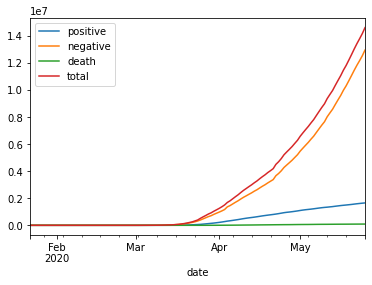

In [188]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

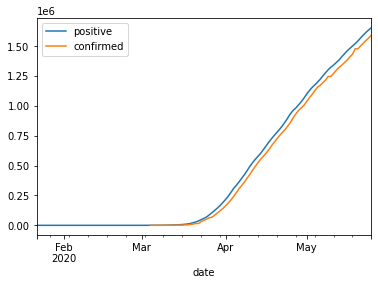

In [189]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

# John Hopkins Data


In [190]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1643246
dead           97720
dtype: int64

In [191]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    94020
dead          3754
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [193]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1643246
Brazil             363211
Russia             344481
United Kingdom     260916
Spain              235772
Italy              229858
France             182709
Germany            180328
Turkey             156827
India              138536
Name: confirmed, dtype: int64

In [194]:
dfctd_state_curr.head()

,date,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,2020-05-25,409,44063,0,10.0,0.0,0.0,0.0,0.0,0.0,361.0,C,5/25/2020 00:00,fa6ca45dae7dccbecf29001b7f8e4014652af677,2020-05-25T20:00:00Z,10,0.0,44472,44472,44472,02,0.0,0.0,964.0,1.0,965.0
AL,2020-05-25,14730,175585,0,0.0,1629.0,0.0,543.0,0.0,323.0,7951.0,B,5/25/2020 00:00,48370c9c719bb9ba5e85861705dbc13216d40158,2020-05-25T20:00:00Z,562,1629.0,190315,190315,190315,01,11.0,17.0,4113.0,403.0,4516.0
AR,2020-05-25,6029,105593,0,92.0,605.0,0.0,0.0,17.0,111.0,4249.0,A,5/25/2020 00:00,712d6752a2efa1e644d28c220b65694d25f9fe29,2020-05-25T20:00:00Z,117,605.0,111622,111622,111622,05,1.0,7.0,2934.0,107.0,3041.0
AS,2020-05-25,0,124,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,5/19/2020 00:00,82e5339de1426930a260a9e3acd24d7f30a55b03,2020-05-25T20:00:00Z,0,0.0,124,124,124,60,0.0,0.0,0.0,0.0,0.0
AZ,2020-05-25,16561,171221,0,833.0,1961.0,334.0,0.0,212.0,0.0,4204.0,A+,5/25/2020 00:00,4ad51611c5e2994947dd17e379bd77c4cfb707f3,2020-05-25T20:00:00Z,806,1961.0,187782,187782,187782,04,6.0,16.0,3919.0,222.0,4141.0


In [0]:
dfState = dfCovidtracking[['date','state','positive', 'death']].set_index('state') \
  .join(dfctd_state_curr.total_positive)

In [0]:
dfState['pct']=dfState.positive/dfState.total_positive

In [197]:
dfState.loc['FL'].head(7)

,date,positive,death,total_positive,pct
state,,,,,
FL,2020-05-25,51746,2331,51746,1.000000
FL,2020-05-24,50867,2316,51746,0.983013
FL,2020-05-23,50127,2312,51746,0.968713
FL,2020-05-22,49451,2268,51746,0.955649
FL,2020-05-21,48675,2222,51746,0.940652
FL,2020-05-20,47471,2173,51746,0.917385
FL,2020-05-19,46944,2129,51746,0.907201


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

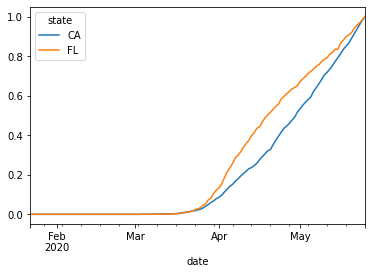

In [199]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

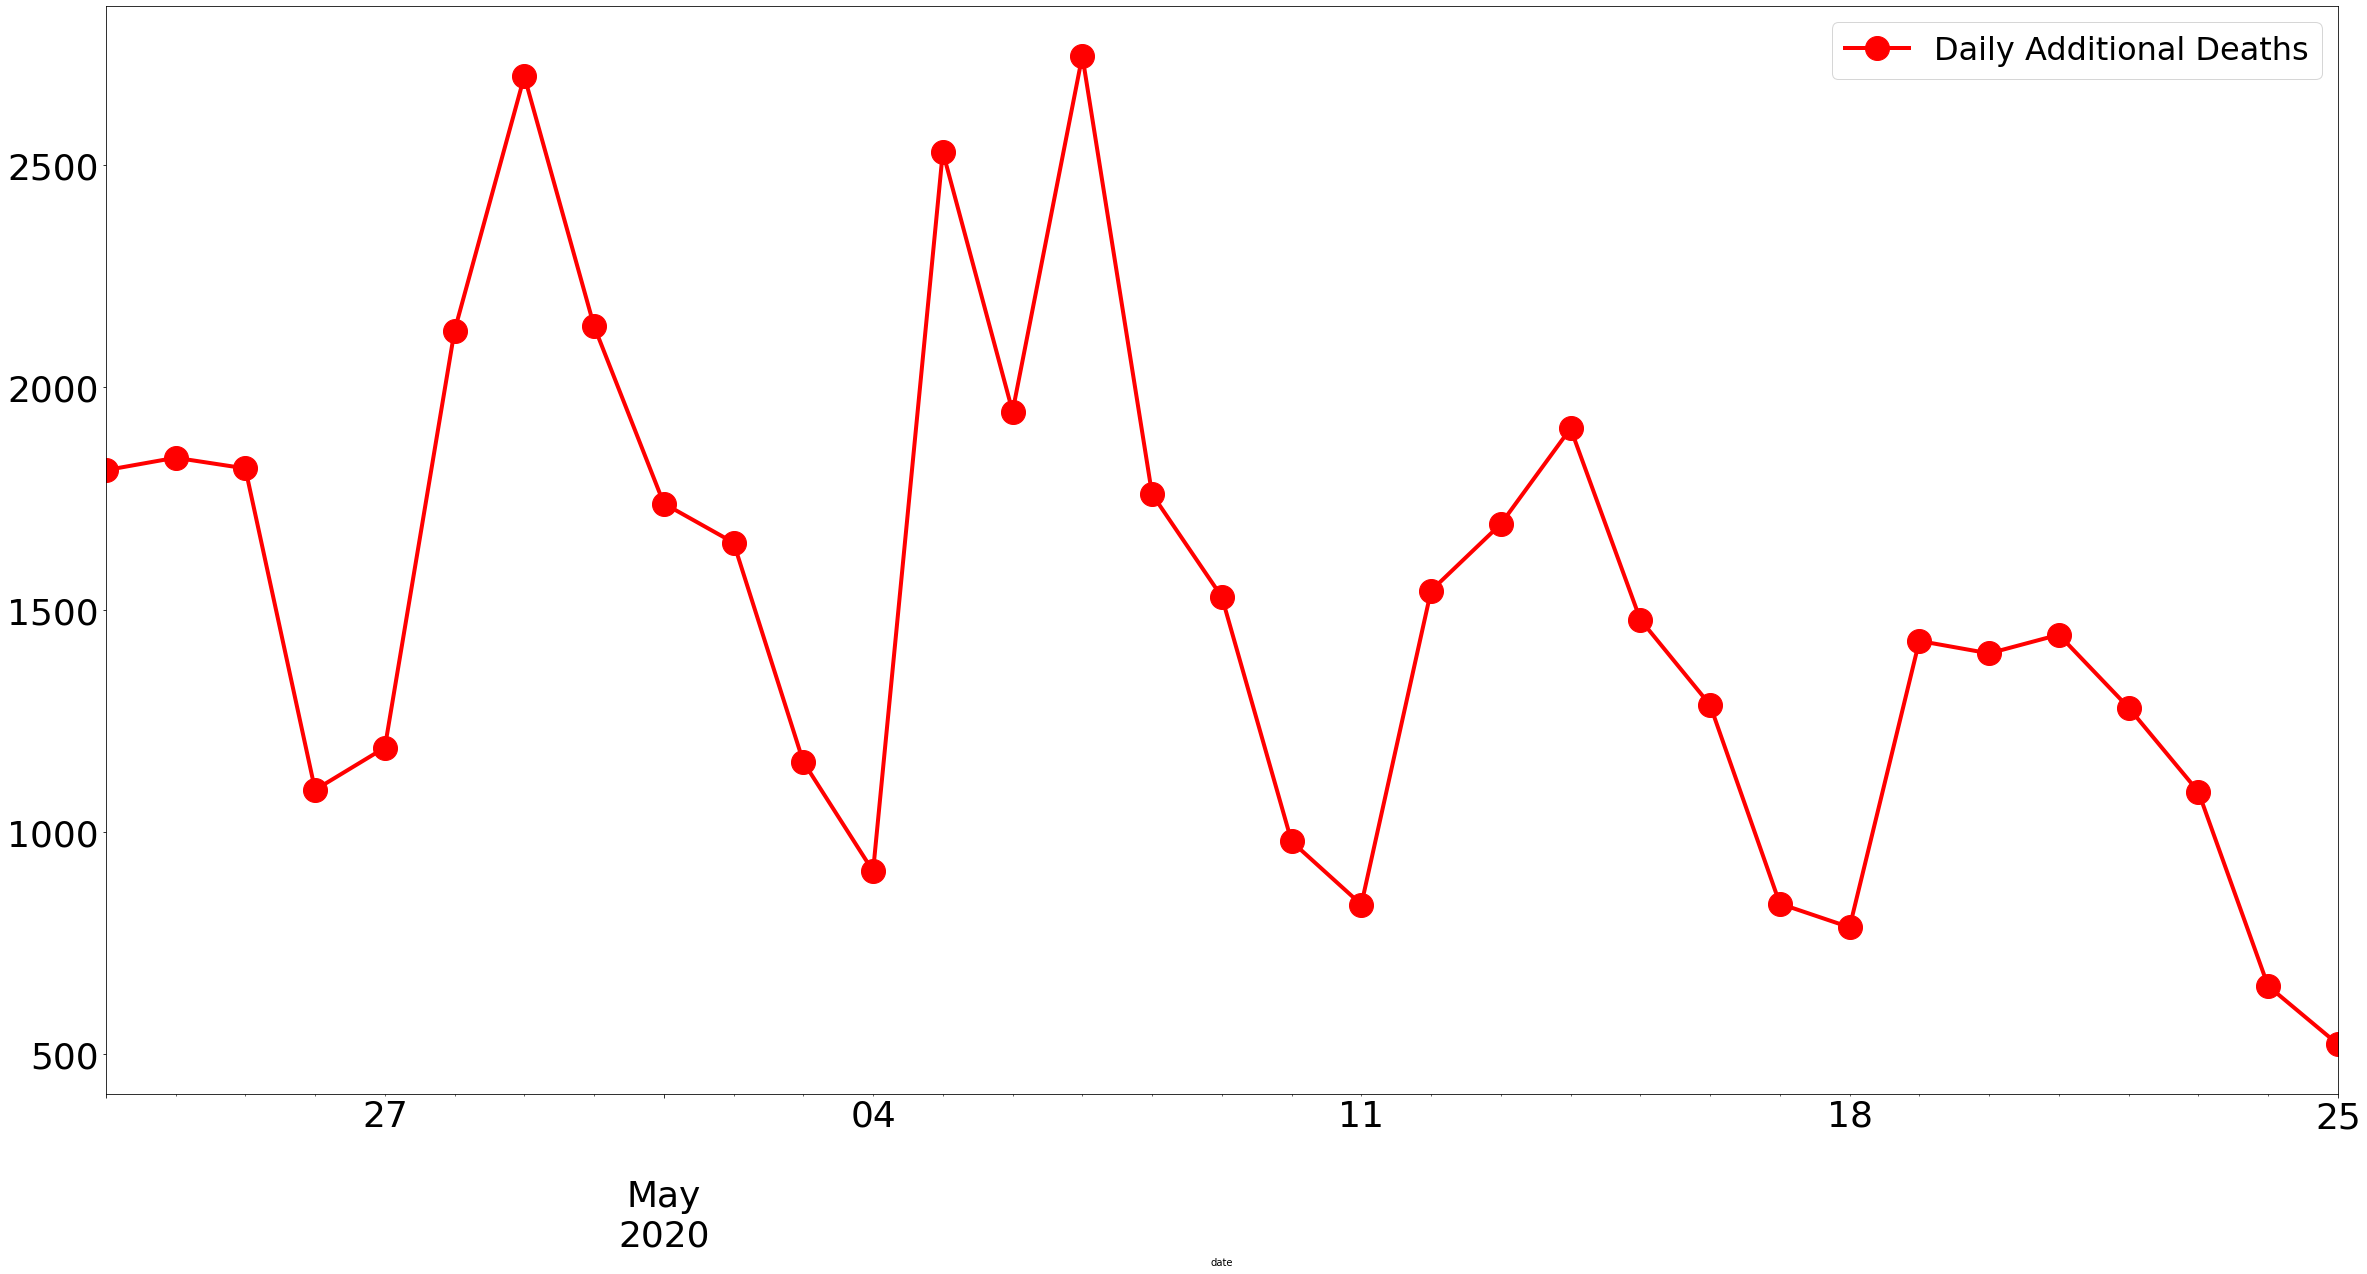

In [201]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


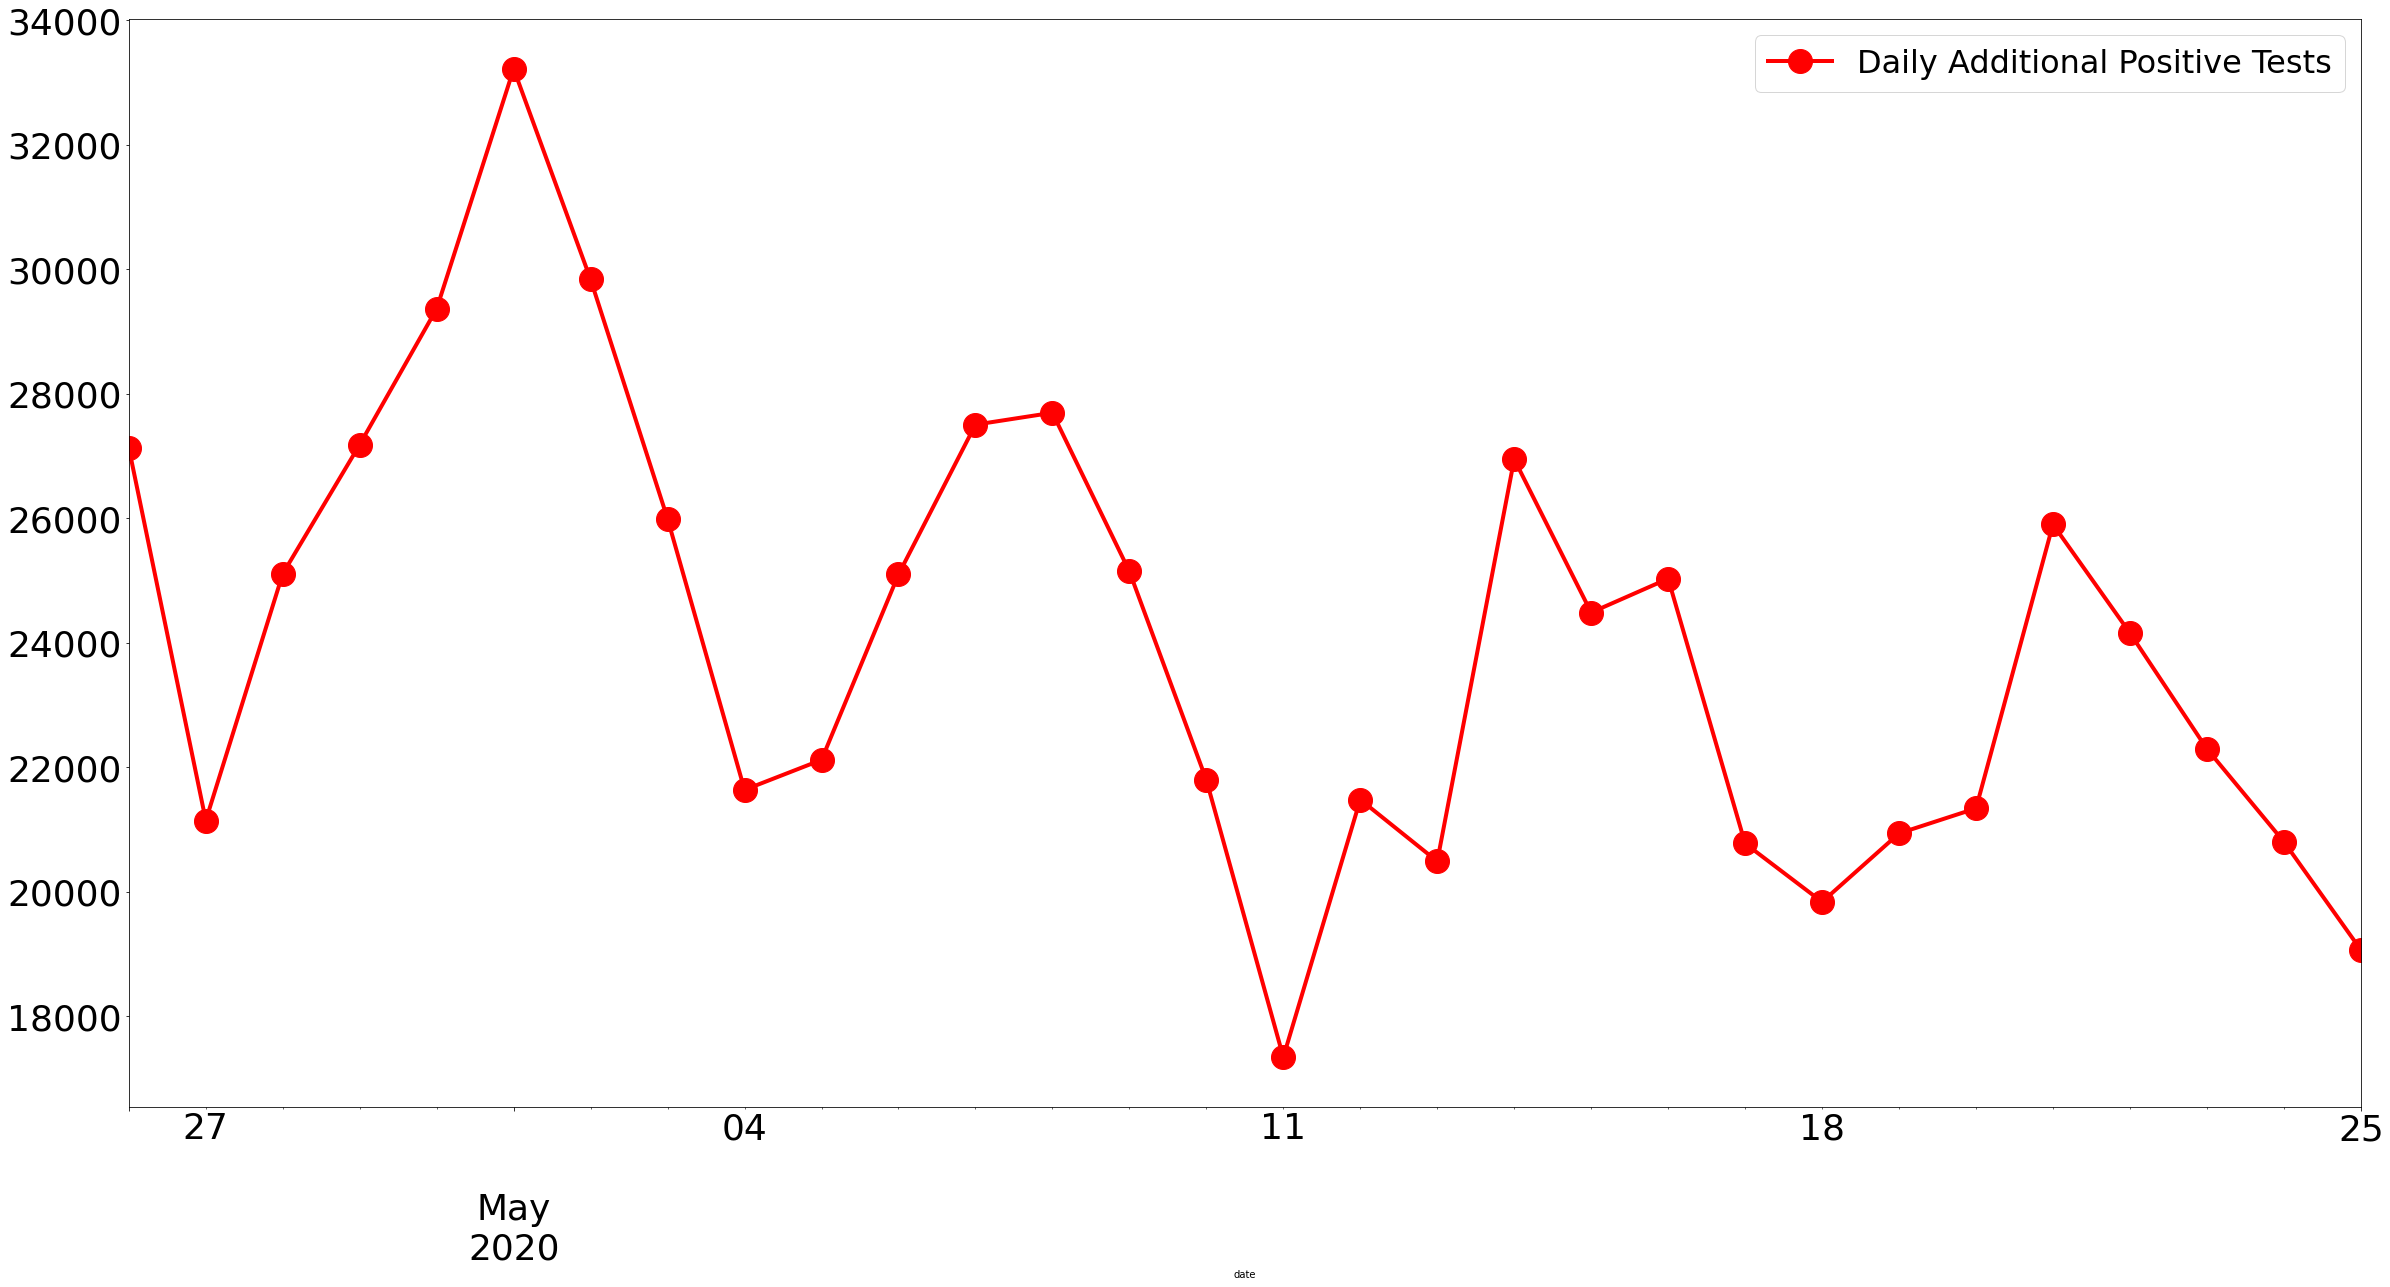

In [202]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()

chart = y1[-30:].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


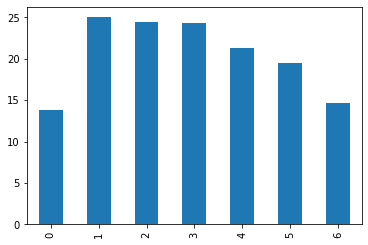

In [205]:
dfDoW.mean().deathIncrease.plot.bar()



In [206]:
dfByWeekYear.sum()[-7:]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202016,14063.0,21844.0,844332.0,199843.0,1044175.0
202017,12864.0,18239.0,1319356.0,209064.0,1528420.0
202018,12704.0,24854.0,1462961.0,191865.0,1654826.0
202019,12402.0,18984.0,1747407.0,171010.0,1909104.0
202020,9584.0,12125.0,2324282.0,156568.0,2480850.0
202021,8087.0,15669.0,2548088.0,155287.0,2703375.0
202022,523.0,967.0,422179.0,19069.0,441248.0


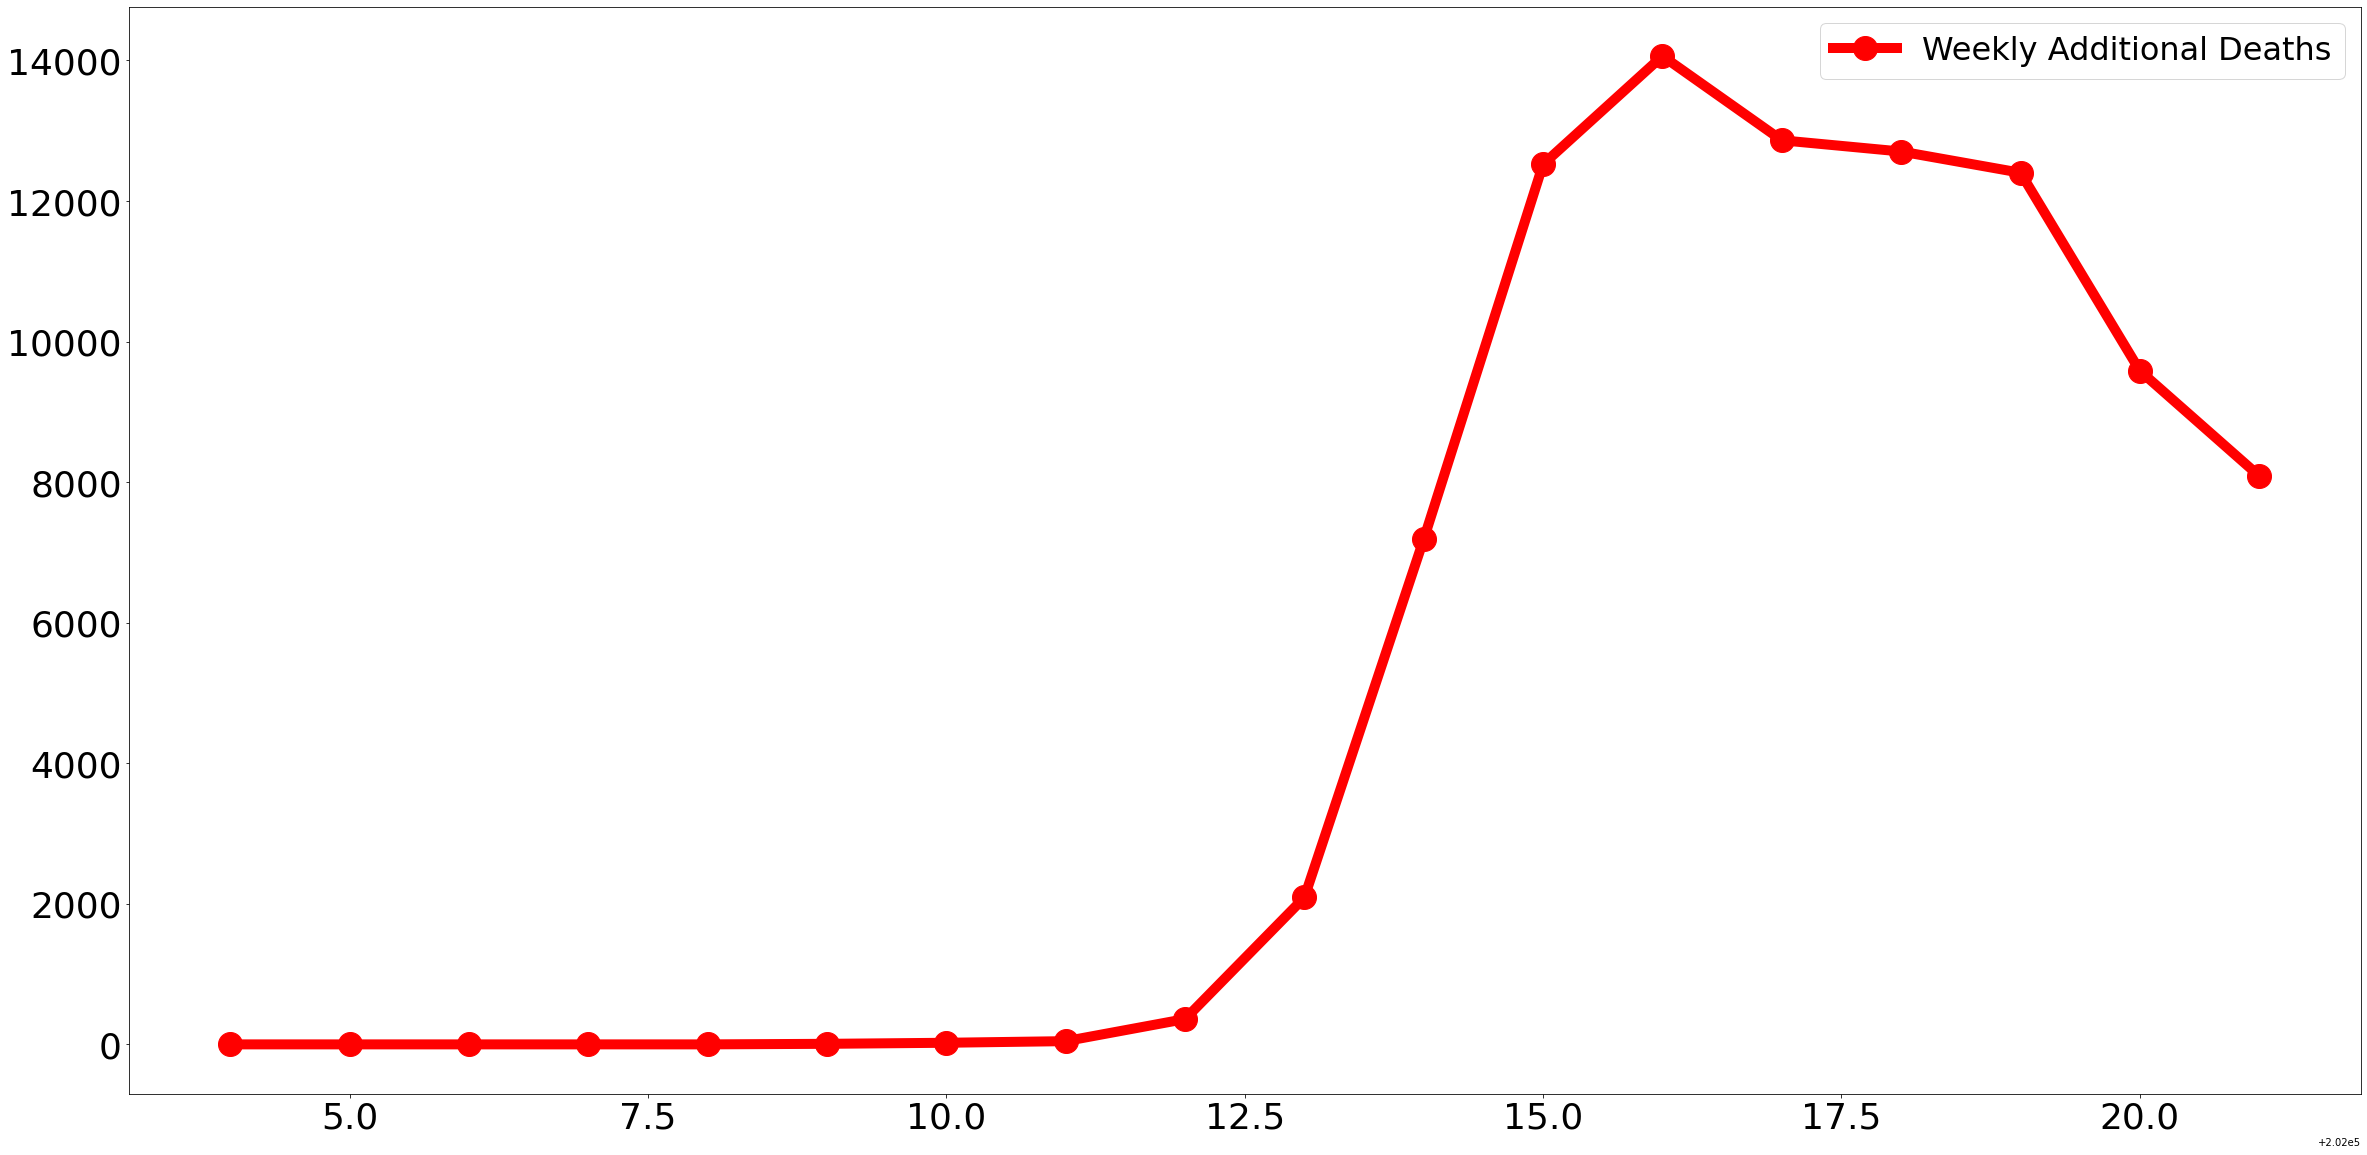

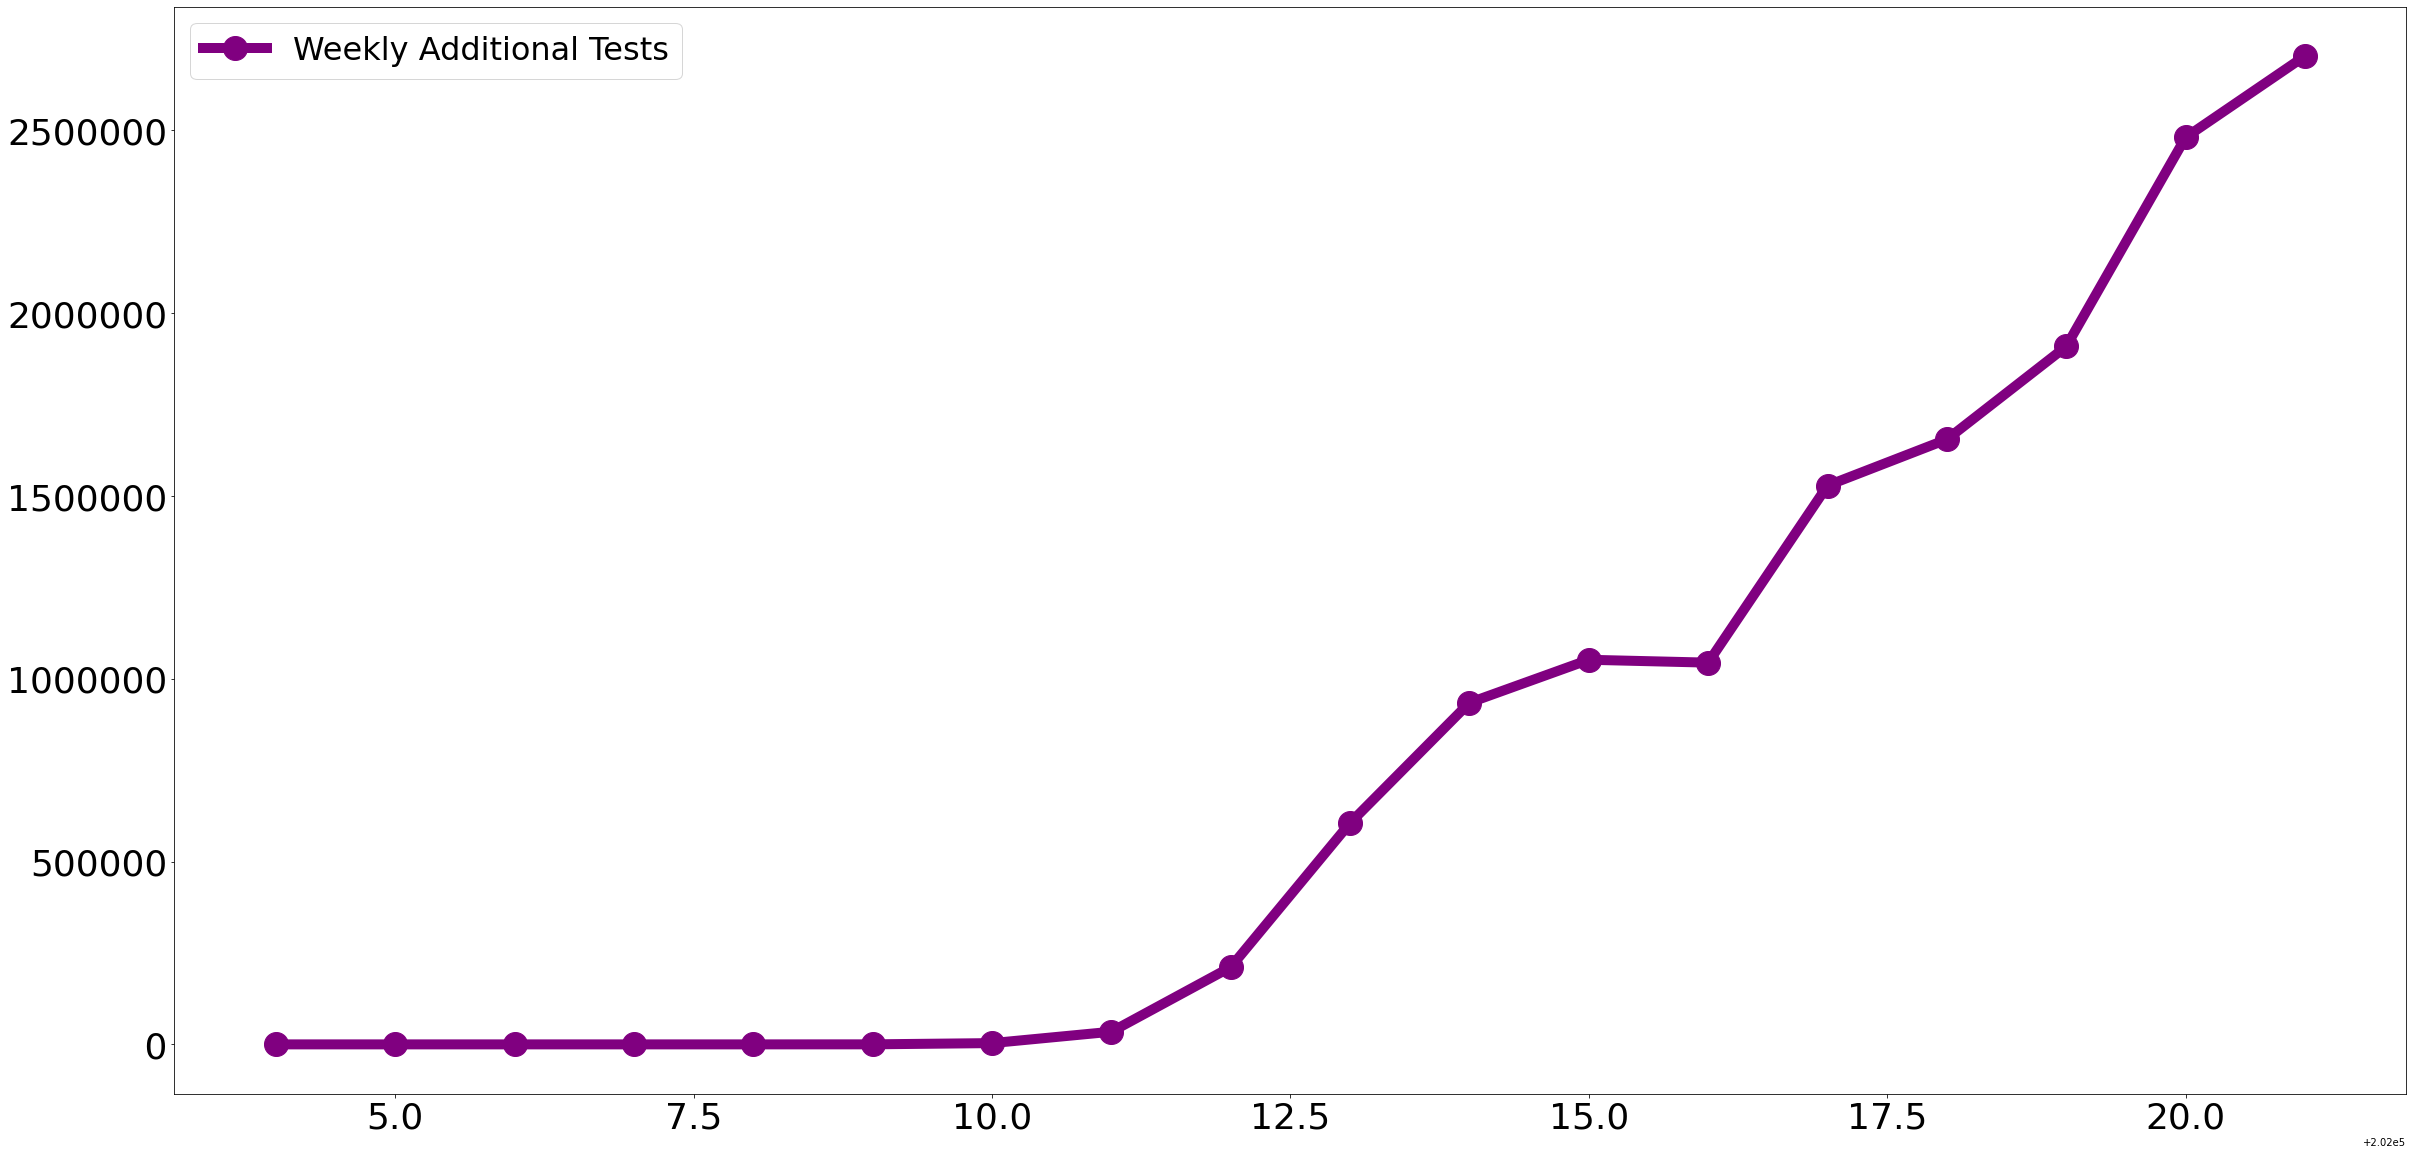

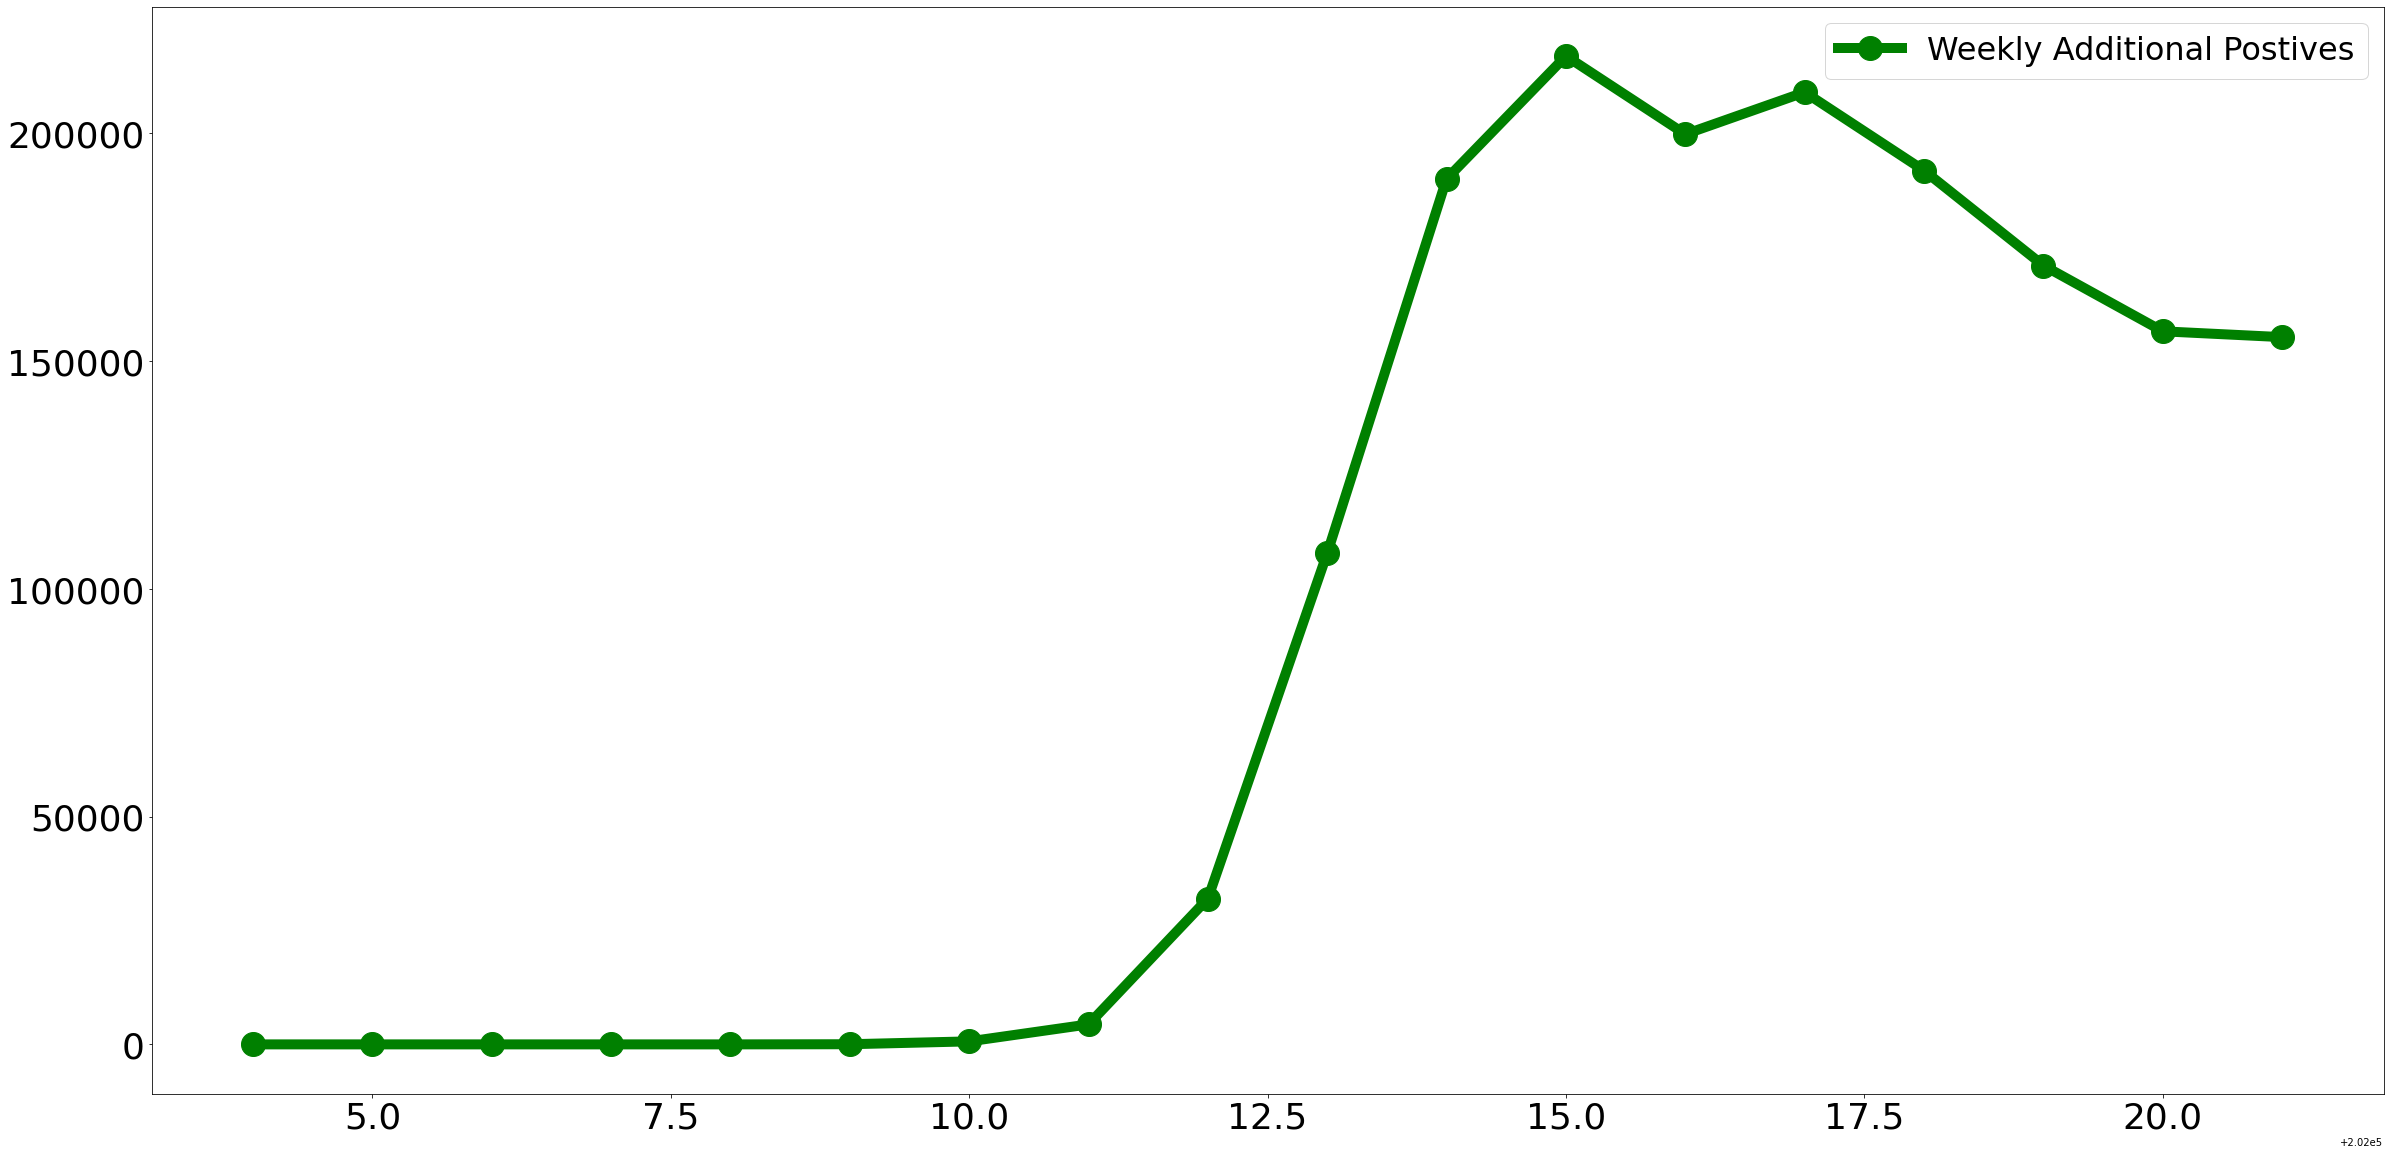

In [207]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

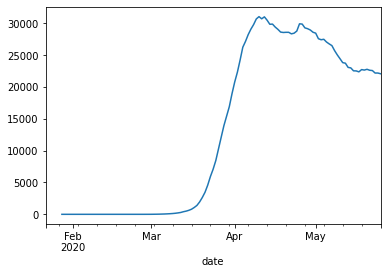

In [208]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

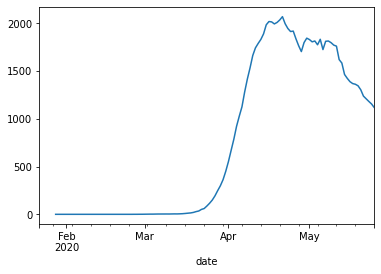

In [209]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().deathIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

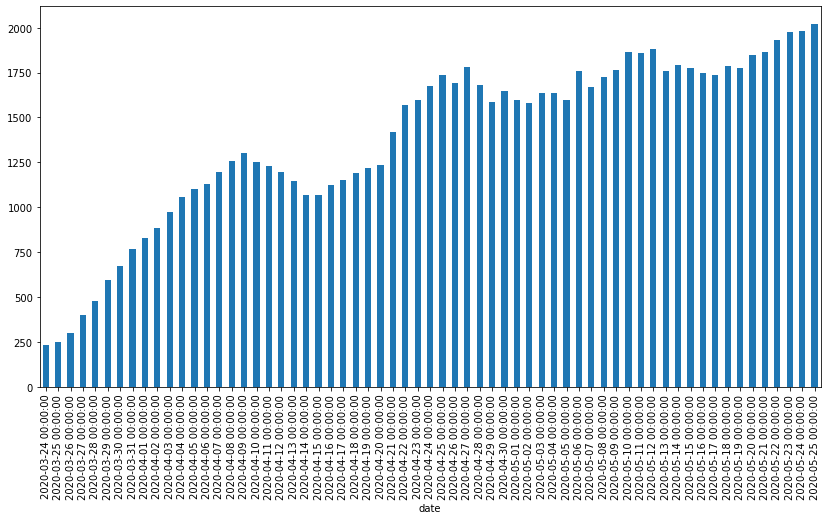

In [211]:

graph1 = dfCAAvg[20:].positiveIncrease.plot.bar(figsize=(14,7))


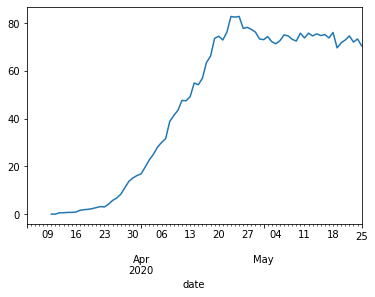

In [212]:
dfCAAvg.deathIncrease.plot.line()

In [213]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,state,date,positive,death,total_positive,pct
804,FL,2020-05-25,51746,2331,51746,1.000000
805,FL,2020-05-24,50867,2316,51746,0.983013
806,FL,2020-05-23,50127,2312,51746,0.968713
807,FL,2020-05-22,49451,2268,51746,0.955649
808,FL,2020-05-21,48675,2222,51746,0.940652
809,FL,2020-05-20,47471,2173,51746,0.917385
810,FL,2020-05-19,46944,2129,51746,0.907201
811,FL,2020-05-18,46442,2073,51746,0.897499
812,FL,2020-05-17,45588,2049,51746,0.880996
813,FL,2020-05-16,44811,2040,51746,0.865980


In [214]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=7)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .75)].sort_values(by='pct')


,state,date,positive,death,total_positive,pct


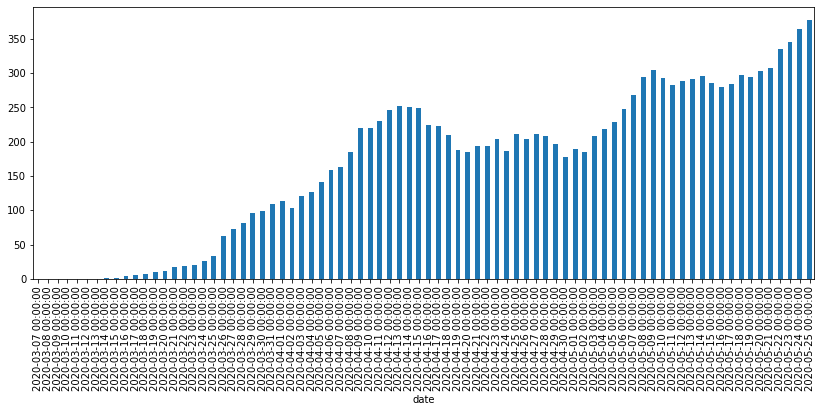

In [215]:

def showStateData(state):
  dfState = dfCovidtracking[dfCovidtracking.state==state].copy()
  dfState.date=pd.to_datetime(dfState.date)
  dfState.set_index('date', inplace=True)

  dfState[::-1].positiveIncrease.rolling(window=7).mean().plot.bar(figsize=(14,5))

showStateData('AL')


# State Population Data


In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [218]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive     1654829
negative    12950113
pending         3368
death          92464
total       14608310
dtype: int64
Current Infection Rate 11.327998%
Percentage of US affected: 0.532323%
Observed CFR: 5.587526%
Percentage of US tested/affected: 4.477647%
Projected affected by cir = 37,182,966
Projected killed = 2,077,608


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [226]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.864769,8.941545
NJ,1.746101,7.023009
MA,1.353224,7.842739
RI,1.327687,12.526514
DC,1.165429,5.781517
CT,1.146415,6.219022
DE,0.920654,5.534811
IL,0.883985,6.073034
LA,0.813308,7.117932


In [227]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 4.449477%


In [228]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [230]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19708 entries, 0 to 19707
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         19644 non-null  object 
 1   location                         19708 non-null  object 
 2   date                             19708 non-null  object 
 3   total_cases                      19708 non-null  int64  
 4   new_cases                        19708 non-null  int64  
 5   total_deaths                     19708 non-null  int64  
 6   new_deaths                       19708 non-null  int64  
 7   total_cases_per_million          19331 non-null  float64
 8   new_cases_per_million            19331 non-null  float64
 9   total_deaths_per_million         19331 non-null  float64
 10  new_deaths_per_million           19331 non-null  float64
 11  total_tests                      5287 non-null   float64
 12  new_tests         

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [233]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    14163694.0
RUS     8945384.0
ITA     3482253.0
DEU     3147771.0
IND     3033591.0
          ...    
MMR       19552.0
MDV       18483.0
CRI       16349.0
ZWE       15555.0
BOL       12349.0
Name: total_tests, Length: 85, dtype: float64

In [234]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 46461121
Total tests done in USA : 14163694
How many more times has the world tested more than the US: 3.3


In [235]:
dfOwidLatest[isUSA].sum()

location                                                         United States
date                                                                2020-05-24
total_cases                                                            1622670
new_cases                                                                21236
total_deaths                                                             97087
new_deaths                                                                1080
total_cases_per_million                                                4902.29
new_cases_per_million                                                   64.157
total_deaths_per_million                                               293.312
new_deaths_per_million                                                   3.263
total_tests                                                        1.41637e+07
new_tests                                                               378908
total_tests_per_thousand                            

In [236]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-7:]

,new_cases,new_deaths
date,,
2020-05-19,21841,791
2020-05-20,19970,1568
2020-05-21,23285,1518
2020-05-22,25434,1263
2020-05-23,24147,1305
2020-05-24,21236,1080
2020-05-25,20568,633


In [0]:
state = 'MN'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state].set_index('date')\
.rolling(window=7).sum()


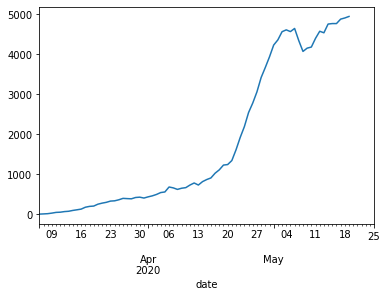

In [238]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [239]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

50867

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'].set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [241]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,286.0,895.0,71079.0,5183.0,76262.0
1,397.0,1444.0,62951.0,7143.0,70094.0
2,314.0,1647.0,55933.0,7257.0,63190.0
3,270.0,1029.0,48070.0,5816.0,53886.0
4,297.0,1139.0,76234.0,7598.0,83832.0
5,174.0,1026.0,77174.0,5350.0,82524.0
6,92.0,295.0,78760.0,4995.0,83755.0


# Socrata (San Francisco) Data

In [242]:
!pip install sodapy

In [0]:
from sodapy import Socrata

In [0]:
client = Socrata("data.sfgov.org", "LCSuN5PrqWkGtBe9dULkS75Rz")
results_df = pd.DataFrame.from_records(client.get("tvq9-ec9w"))

In [245]:
results_df.case_disposition.unique()

array(['Confirmed', 'Death'], dtype=object)

In [0]:
res = results_df.astype({'case_count':'int16'})

In [0]:
dfresConf = res[res.case_disposition=='Confirmed']
dfresDead = res[res.case_disposition=='Death']

In [248]:
dfresDead.groupby('date').sum().tail(5)

,case_count
date,
2020-05-08T00:00:00.000,1
2020-05-09T00:00:00.000,2
2020-05-12T00:00:00.000,1
2020-05-15T00:00:00.000,1
2020-05-17T00:00:00.000,1


In [249]:
dfresConf.groupby('date').sum().rename(columns={'case_count':'new_cases'}).tail()

,new_cases
date,
2020-05-19T00:00:00.000,48
2020-05-20T00:00:00.000,32
2020-05-21T00:00:00.000,43
2020-05-22T00:00:00.000,22
2020-05-23T00:00:00.000,17


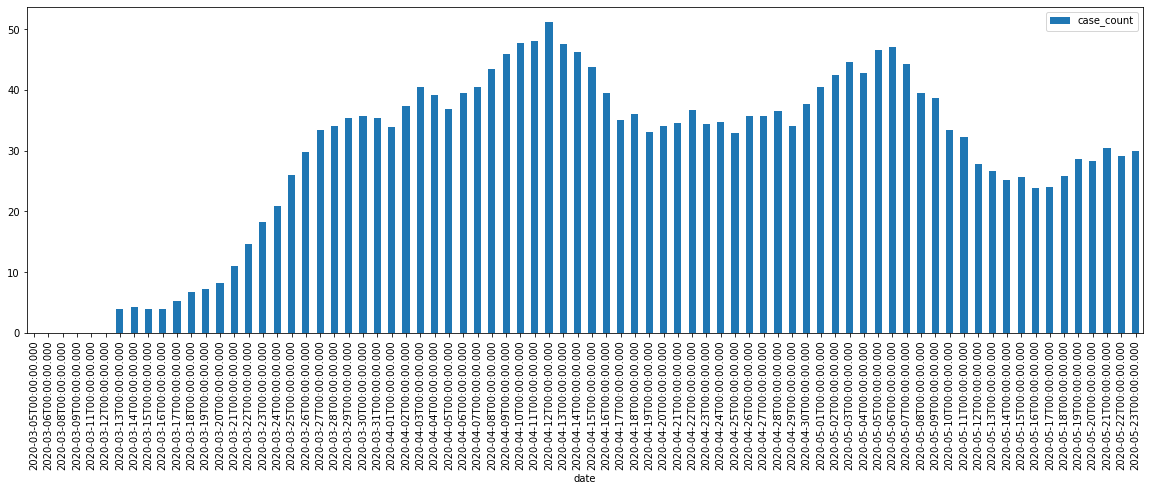

In [250]:
dfresConf.groupby('date').sum().rolling(window=7).mean().plot.bar(figsize=(20,6))

# Marin Data

In [0]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRmO2pStf7Ft1yYjDULluZXzUAczGK_B34hDemDBadGEY0HTLwlcadF2cHNEwmmvLetUTf-D2ruYCT/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url, header=1, parse_dates=[0], usecols=[0,1,3,5,6,7], index_col=[0])

In [252]:
df.tail()

,positive,deaths,tested,hospitalizations,Recovered
date,,,,,
2020-05-21,352,14.0,10189.0,50.0,244.0
2020-05-22,369,14.0,10694.0,50.0,251.0
2020-05-23,388,14.0,11023.0,51.0,253.0
2020-05-24,403,14.0,11307.0,51.0,255.0
2020-05-25,417,14.0,11587.0,51.0,262.0


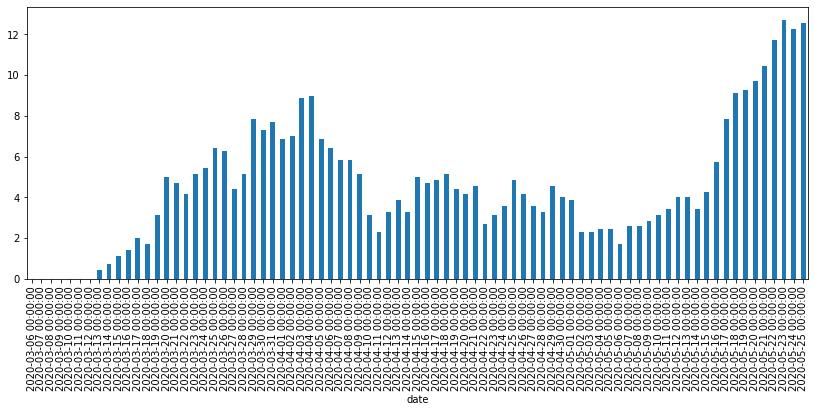

In [253]:
chart= df.positive.diff().rolling(window=7).mean().plot.bar(figsize=(14,5))

In [254]:
marin_pop = 259725

print(f"Marin Population Positive: {(df[-1:].positive.values[0]/marin_pop)*100:2.2f}%")
print(f"Marin Population Tested: {(df[-1:].tested.values[0]/marin_pop)*100:2.2f}%")

Marin Population Positive: 0.16%
Marin Population Tested: 4.46%


In [255]:
df.positive.diff().rolling(window=7).mean().tail()

date
2020-05-21    10.428571
2020-05-22    11.714286
2020-05-23    12.714286
2020-05-24    12.285714
2020-05-25    12.571429
Name: positive, dtype: float64